## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.733375 -0.857913  0.296580  0.588415  0.001413  0.312431
1 -0.175131 -1.054611 -0.185784 -1.364635 -1.609006 -2.059373
2 -1.425116  1.229024  1.001324 -1.384328  1.452172 -0.845893
3 -1.738812  0.253805 -1.576728 -0.167397 -1.172821 -0.845150
4  1.306743 -0.274341  0.942868 -1.111226 -1.731988 -0.361945


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9718741	total: 57.4ms	remaining: 57.3s
1:	learn: 0.9619259	total: 57.8ms	remaining: 28.9s
2:	learn: 0.9523288	total: 58.3ms	remaining: 19.4s
3:	learn: 0.9416415	total: 58.8ms	remaining: 14.6s
4:	learn: 0.9329884	total: 59.3ms	remaining: 11.8s
5:	learn: 0.9246050	total: 59.8ms	remaining: 9.91s
6:	learn: 0.9132882	total: 60.3ms	remaining: 8.55s
7:	learn: 0.9061064	total: 60.9ms	remaining: 7.56s
8:	learn: 0.8983457	total: 61.4ms	remaining: 6.75s
9:	learn: 0.8900401	total: 61.8ms	remaining: 6.12s
10:	learn: 0.8814033	total: 63.1ms	remaining: 5.67s
11:	learn: 0.8730568	total: 63.7ms	remaining: 5.25s
12:	learn: 0.8629282	total: 64.2ms	remaining: 4.87s
13:	learn: 0.8545294	total: 64.6ms	remaining: 4.55s
14:	learn: 0.8480102	total: 65.1ms	remaining: 4.28s
15:	learn: 0.8396594	total: 65.6ms	remaining: 4.04s
16:	learn: 0.8320101	total: 66.1ms	remaining: 3.82s
17:	learn: 0.8235686	total: 66.8ms	remaining: 3.64s
18:	learn: 0.8153293	total: 67.3ms	remaining

98:	learn: 0.4112950	total: 108ms	remaining: 984ms
99:	learn: 0.4080601	total: 109ms	remaining: 980ms
100:	learn: 0.4052387	total: 109ms	remaining: 973ms
101:	learn: 0.4020613	total: 110ms	remaining: 966ms
102:	learn: 0.3991434	total: 110ms	remaining: 960ms
103:	learn: 0.3959552	total: 111ms	remaining: 953ms
104:	learn: 0.3934903	total: 111ms	remaining: 948ms
105:	learn: 0.3903128	total: 112ms	remaining: 941ms
106:	learn: 0.3872311	total: 112ms	remaining: 935ms
107:	learn: 0.3844714	total: 113ms	remaining: 930ms
108:	learn: 0.3818532	total: 113ms	remaining: 926ms
109:	learn: 0.3789187	total: 114ms	remaining: 921ms
110:	learn: 0.3763680	total: 114ms	remaining: 916ms
111:	learn: 0.3736132	total: 115ms	remaining: 911ms
112:	learn: 0.3710793	total: 115ms	remaining: 906ms
113:	learn: 0.3688295	total: 116ms	remaining: 900ms
114:	learn: 0.3656632	total: 116ms	remaining: 894ms
115:	learn: 0.3628738	total: 117ms	remaining: 888ms
116:	learn: 0.3602763	total: 117ms	remaining: 882ms
117:	learn: 0.

268:	learn: 0.1372223	total: 187ms	remaining: 507ms
269:	learn: 0.1367723	total: 187ms	remaining: 506ms
270:	learn: 0.1362559	total: 188ms	remaining: 505ms
271:	learn: 0.1353030	total: 188ms	remaining: 503ms
272:	learn: 0.1343168	total: 188ms	remaining: 502ms
273:	learn: 0.1332856	total: 189ms	remaining: 500ms
274:	learn: 0.1323934	total: 189ms	remaining: 499ms
275:	learn: 0.1315090	total: 190ms	remaining: 497ms
276:	learn: 0.1308912	total: 190ms	remaining: 496ms
277:	learn: 0.1300745	total: 191ms	remaining: 495ms
278:	learn: 0.1288625	total: 191ms	remaining: 493ms
279:	learn: 0.1284080	total: 191ms	remaining: 492ms
280:	learn: 0.1277541	total: 192ms	remaining: 491ms
281:	learn: 0.1268873	total: 192ms	remaining: 490ms
282:	learn: 0.1261646	total: 193ms	remaining: 488ms
283:	learn: 0.1251919	total: 193ms	remaining: 487ms
284:	learn: 0.1245308	total: 194ms	remaining: 486ms
285:	learn: 0.1236294	total: 194ms	remaining: 485ms
286:	learn: 0.1228519	total: 195ms	remaining: 484ms
287:	learn: 

477:	learn: 0.0431263	total: 292ms	remaining: 319ms
478:	learn: 0.0429165	total: 293ms	remaining: 319ms
479:	learn: 0.0427244	total: 294ms	remaining: 318ms
480:	learn: 0.0425250	total: 294ms	remaining: 317ms
481:	learn: 0.0423372	total: 295ms	remaining: 317ms
482:	learn: 0.0421524	total: 295ms	remaining: 316ms
483:	learn: 0.0418754	total: 296ms	remaining: 315ms
484:	learn: 0.0416451	total: 296ms	remaining: 314ms
485:	learn: 0.0413748	total: 297ms	remaining: 314ms
486:	learn: 0.0411051	total: 297ms	remaining: 313ms
487:	learn: 0.0409539	total: 297ms	remaining: 312ms
488:	learn: 0.0408046	total: 298ms	remaining: 311ms
489:	learn: 0.0406572	total: 299ms	remaining: 311ms
490:	learn: 0.0405116	total: 299ms	remaining: 310ms
491:	learn: 0.0403158	total: 299ms	remaining: 309ms
492:	learn: 0.0401388	total: 300ms	remaining: 308ms
493:	learn: 0.0399963	total: 300ms	remaining: 307ms
494:	learn: 0.0398307	total: 301ms	remaining: 307ms
495:	learn: 0.0396135	total: 301ms	remaining: 306ms
496:	learn: 

633:	learn: 0.0216424	total: 371ms	remaining: 214ms
634:	learn: 0.0215611	total: 371ms	remaining: 214ms
635:	learn: 0.0214829	total: 372ms	remaining: 213ms
636:	learn: 0.0213949	total: 373ms	remaining: 212ms
637:	learn: 0.0213108	total: 373ms	remaining: 212ms
638:	learn: 0.0212282	total: 373ms	remaining: 211ms
639:	learn: 0.0211505	total: 374ms	remaining: 210ms
640:	learn: 0.0210493	total: 374ms	remaining: 210ms
641:	learn: 0.0209738	total: 375ms	remaining: 209ms
642:	learn: 0.0208999	total: 375ms	remaining: 208ms
643:	learn: 0.0208276	total: 376ms	remaining: 208ms
644:	learn: 0.0207778	total: 376ms	remaining: 207ms
645:	learn: 0.0207460	total: 377ms	remaining: 206ms
646:	learn: 0.0206485	total: 377ms	remaining: 206ms
647:	learn: 0.0205784	total: 378ms	remaining: 205ms
648:	learn: 0.0205472	total: 378ms	remaining: 204ms
649:	learn: 0.0205165	total: 378ms	remaining: 204ms
650:	learn: 0.0203987	total: 379ms	remaining: 203ms
651:	learn: 0.0203502	total: 379ms	remaining: 202ms
652:	learn: 

847:	learn: 0.0104512	total: 476ms	remaining: 85.3ms
848:	learn: 0.0104136	total: 477ms	remaining: 84.8ms
849:	learn: 0.0103742	total: 477ms	remaining: 84.2ms
850:	learn: 0.0103414	total: 478ms	remaining: 83.6ms
851:	learn: 0.0102917	total: 478ms	remaining: 83ms
852:	learn: 0.0102556	total: 478ms	remaining: 82.4ms
853:	learn: 0.0102323	total: 479ms	remaining: 81.8ms
854:	learn: 0.0101939	total: 479ms	remaining: 81.3ms
855:	learn: 0.0101618	total: 480ms	remaining: 80.7ms
856:	learn: 0.0101226	total: 480ms	remaining: 80.1ms
857:	learn: 0.0100912	total: 480ms	remaining: 79.5ms
858:	learn: 0.0100632	total: 481ms	remaining: 79ms
859:	learn: 0.0100121	total: 481ms	remaining: 78.4ms
860:	learn: 0.0099621	total: 482ms	remaining: 77.9ms
861:	learn: 0.0099319	total: 483ms	remaining: 77.3ms
862:	learn: 0.0098831	total: 487ms	remaining: 77.4ms
863:	learn: 0.0098493	total: 488ms	remaining: 76.8ms
864:	learn: 0.0098212	total: 488ms	remaining: 76.2ms
865:	learn: 0.0097739	total: 489ms	remaining: 75.6

995:	learn: 0.0069693	total: 556ms	remaining: 2.23ms
996:	learn: 0.0069636	total: 556ms	remaining: 1.67ms
997:	learn: 0.0069433	total: 557ms	remaining: 1.11ms
998:	learn: 0.0069218	total: 557ms	remaining: 557us
999:	learn: 0.0069105	total: 557ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

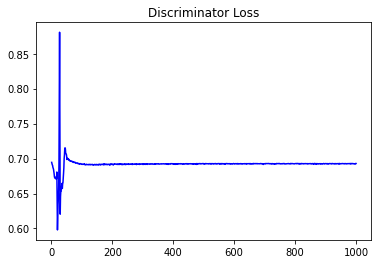

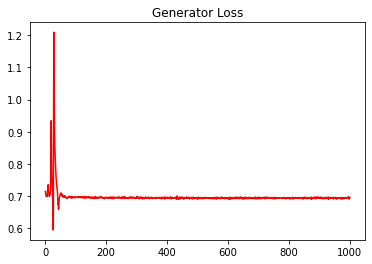

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.043326038314607566


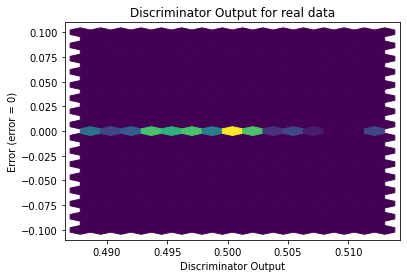

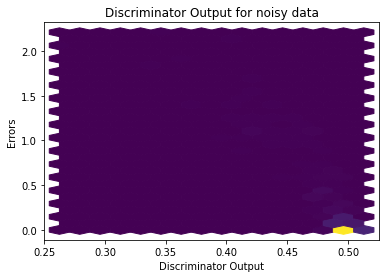

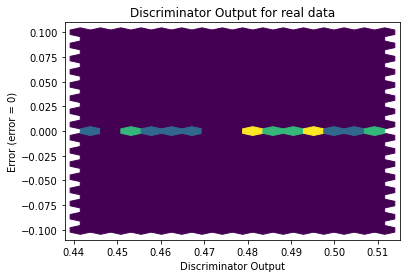

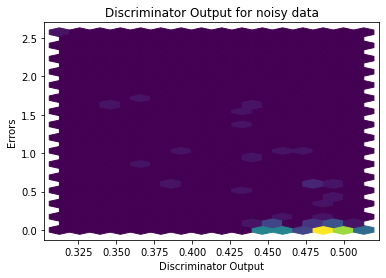

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


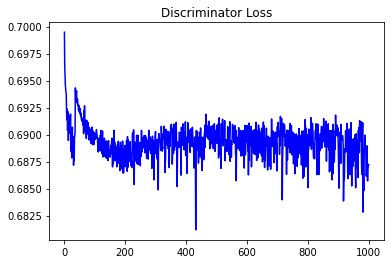

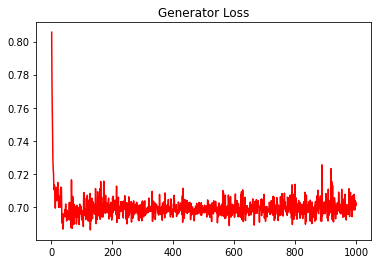

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.042499698129303085


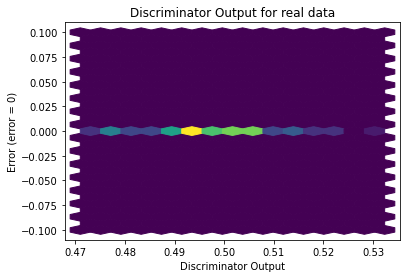

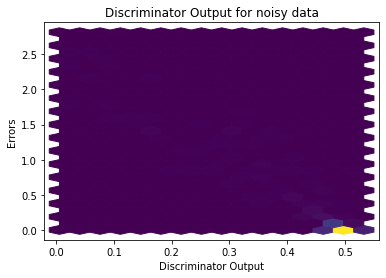

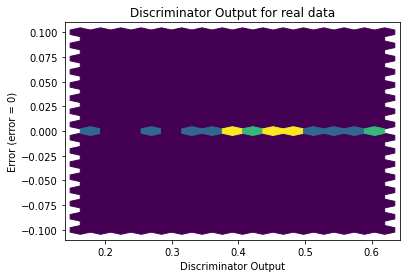

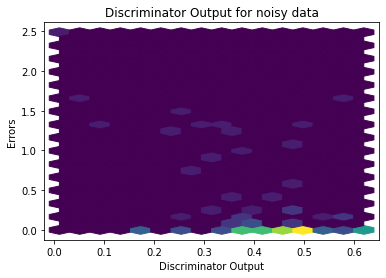

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2104]], requires_grad=True)
